# Recurrences unfolding

In [1]:
import sys

sys.setrecursionlimit(10000)

In [2]:
%run "recurrences.py"

---

In [3]:
import sympy
from sympy import *
from sympy.abc import x, n, z, t, k

init_printing() # for nice printing, a-la' TeX

## Quicksort's checks recurrence

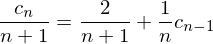

In [10]:
c = IndexedBase('c')
checks_recurrence = Eq(c[n]/(n+1), 2/(n+1) + c[n-1]/n)
checks_recurrence

In [11]:
checks_recurrence_spec=dict(recurrence_eq=checks_recurrence, indexed=c, index=n, terms_cache={})

In [12]:
unfolded = do_unfolding_steps(checks_recurrence_spec, steps=0)

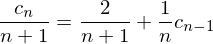

In [13]:
project_recurrence_spec(unfolded, recurrence_eq=True)

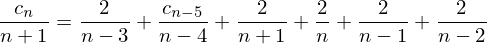

In [16]:
unfolded = do_unfolding_steps(checks_recurrence_spec,4)
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

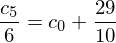

In [17]:
recurrence_eq.subs(n,5)

In [18]:
boundary_conditions = {c[0]:Integer(0)}

checks_recurrence_spec=dict(recurrence_eq=checks_recurrence, indexed=c, index=n, 
                            terms_cache=boundary_conditions)

unfolded = do_unfolding_steps(checks_recurrence_spec, steps=4)

In [19]:
instantiated_rec_spec = base_instantiation(unfolded)

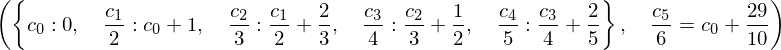

In [20]:
project_recurrence_spec(instantiated_rec_spec, recurrence_eq=True, terms_cache=True)

In [21]:
fully_instantiated_spec = repeated_instantiating(instantiated_rec_spec)

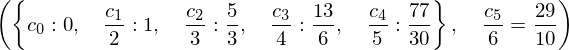

In [22]:
project_recurrence_spec(fully_instantiated_spec, recurrence_eq=True, terms_cache=True)

In [23]:
ipython_latex(checks_recurrence_spec, times_range=range(10))

<IPython.core.display.Latex object>

## Quicksort's swaps recurrence

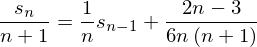

In [24]:
s = IndexedBase('s')
swaps_recurrence = Eq(s[n]/(n+1),s[n-1]/n + (2*n-3)/(6*n*(n+1)))
swaps_recurrence

In [25]:
swaps_recurrence_spec=dict(recurrence_eq=swaps_recurrence, indexed=s, index=n, terms_cache={})

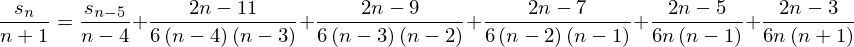

In [26]:
unfolded = do_unfolding_steps(swaps_recurrence_spec, 4)
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

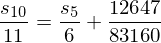

In [27]:
recurrence_eq.subs(n,10)

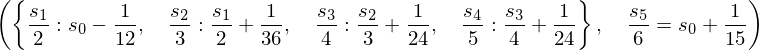

In [28]:
project_recurrence_spec(base_instantiation(unfolded), recurrence_eq=True, terms_cache=True)

### With boundary conditions

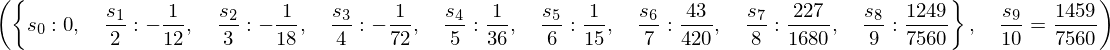

In [29]:
swaps_recurrence_spec=dict(recurrence_eq=swaps_recurrence, indexed=s, index=n, terms_cache={s[0]:Integer(0)})
unfolded = do_unfolding_steps(swaps_recurrence_spec, steps=8)
instantiated_rec_spec = base_instantiation(unfolded)
fully_instantiated_spec = repeated_instantiating(instantiated_rec_spec)
project_recurrence_spec(fully_instantiated_spec, recurrence_eq=True, terms_cache=True)

In [30]:
ipython_latex(swaps_recurrence_spec, times_range=range(10))

<IPython.core.display.Latex object>

## Fibonacci recurrence

A nice picture is [here][fibonacci-oeis].

[fibonacci-oeis]:http://oeis.org/A000045/a000045.html

### Backwards subscripts

In [4]:
f = IndexedBase('f')
fibonacci_recurrence = Eq(f[n],f[n-1]+f[n-2])
fibonacci_recurrence

In [32]:
n2_subs = Subs(fibonacci_recurrence, f[n-1], f[n-3]+f[n-2])
n2_subs

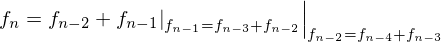

In [33]:
n1_subs = Subs(n2_subs, f[n-2], f[n-4]+f[n-3])
n1_subs

In [34]:
n1_subs.doit()

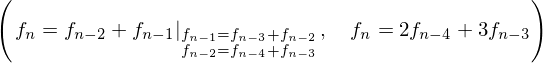

In [35]:
n_subs = Subs(fibonacci_recurrence, [f[n-1],f[n-2]], [f[n-3]+f[n-2], f[n-4]+f[n-3]], simultaneous=True)
n_subs, n_subs.doit()

In [36]:
n_subs.expr, n_subs.variables, n_subs.point

In [37]:
n_subs.args

In [38]:
def do_simultaneous_subs(subs_term):
    expr_term, variables, points, *_ = subs_term.args
    substitutions = {k:v for k,v in zip(variables, points)}
    return expr_term.subs(substitutions, simultaneous=True)

In [39]:
do_simultaneous_subs(n_subs)

In [40]:
n1_subs.expr

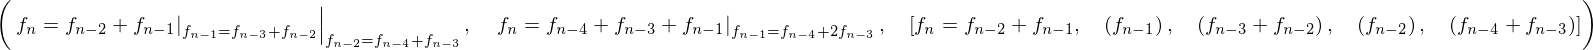

In [41]:
n1_subs, do_simultaneous_subs(n1_subs), flatten(n1_subs.args, cls=Subs)

In [42]:
ite_term = ITE(Eq(Mod(n,2),1), n+1, n)
my_lambda_subs = Lambda(n, ite_term)
ite_term,ite_term.subs(n,3),my_lambda_subs(3)

In [43]:
power_fib = Eq(f[2*n+1],ITE(Eq(Mod(n,2),1), Subs(f[n]**2+f[n+1]**2, f[n], 2), Subs(f[n]**2+f[n+1]**2, f[n+1], 3)))
power_fib

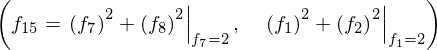

In [44]:
power_fib.subs({n:7}), power_fib.subs({n:(n-1)/2}).rhs.subs({n:3})

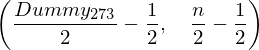

In [45]:
d = Dummy()
sol = solve(Eq(2*n+1,d),n)[0]
sol, sol.subs(d,n)

In [46]:
n_subs.doit()

In [47]:
n_subs.args

In [5]:
fibonacci_recurrence_spec=dict(recurrence_eq=fibonacci_recurrence, indexed=f, index=n, terms_cache={})

In [6]:
unfolded = do_unfolding_steps(fibonacci_recurrence_spec, 3, first_order=False)
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

In [7]:
factored_recurrence_eq = project_recurrence_spec(factor_rhs_unfolded_rec(unfolded), recurrence_eq=True)
factored_recurrence_eq

In [8]:
factored_recurrence_eq.subs(n, 16)

In [9]:
project_recurrence_spec(base_instantiation(unfolded), recurrence_eq=True, terms_cache=True)

In [10]:
ipython_latex(fibonacci_recurrence_spec, times_range=range(5), first_order=False)

<IPython.core.display.Latex object>

In [11]:
cached_terms = project_recurrence_spec(fibonacci_recurrence_spec, terms_cache=True)
cached_terms

In [12]:
fibs = {f[i]:fibonacci(i) for i in range(0,51)}
fibs

In [13]:
fib_term = f[n-5]
fib_eq = Eq(fib_term,cached_terms[fib_term])
fib_eq

In [14]:
instantiated_eq = fib_eq.subs({n:50})
instantiated_eq

In [15]:
instantiated_eq.subs(fibs)

In [16]:
maybe_fib = Eq(f[n],f[n-8]+4*f[n-7]+6*f[n-6]+4*f[n-5]+f[n-4])
maybe_fib

In [19]:
maybe_fib_instantiated = maybe_fib.subs({n:45})
maybe_fib_instantiated

In [20]:
maybe_fib_instantiated.subs(fibs)

In [21]:
maybe_fib_instantiated = maybe_fib.subs({n:28})
maybe_fib_instantiated

In [22]:
maybe_fib_instantiated.subs(fibs)

In [23]:
maybe_fib = Eq(f[n],f[n-16]+8*f[n-15]+28*f[n-14]+56*f[n-13]+70*f[n-12]+
               f[n-8]+8*f[n-9]+28*f[n-10]+56*f[n-11])
maybe_fib

In [24]:
maybe_fib_instantiated = maybe_fib.subs({n:28})
maybe_fib_instantiated

In [25]:
maybe_fib_instantiated.subs(fibs)

### An generalization attempt

In [26]:
%run "sums.py"

In [27]:
def expand_sum_in_eq(eq_term):
    lhs, rhs = eq_term.lhs, eq_term.rhs
    return Eq(lhs, expand_Sum(rhs))

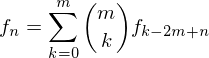

In [28]:
m = symbols('m')
thm = Eq(f[n], Sum(binomial(m,k)*f[n-2*m+k], (k,0,m)))
thm

In [29]:
expanded_eq = expand_sum_in_eq(thm.subs({m:20}))
expanded_eq

In [31]:
subsed = expanded_eq.subs(n, 40)
subsed

In [32]:
subsed.subs(fibs)

### Forward subscripts

In [33]:
f = IndexedBase('f')
fibonacci_recurrence = Eq(f[n+2],f[n+1]+f[n])
fibonacci_recurrence

In [34]:
boundary_conditions = {f[0]:Integer(0), f[1]:Integer(1)}
fibonacci_recurrence_spec=dict(recurrence_eq=fibonacci_recurrence, indexed=f, 
                               index=n, terms_cache=boundary_conditions)

In [35]:
unfolded = do_unfolding_steps(fibonacci_recurrence_spec, 5)

In [36]:
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

In [37]:
factored_recurrence_eq = project_recurrence_spec(factor_rhs_unfolded_rec(unfolded), recurrence_eq=True)
factored_recurrence_eq

In [38]:
factored_recurrence_eq.subs(n,10)

In [39]:
instantiated_rec_spec = base_instantiation(unfolded)

In [40]:
project_recurrence_spec(instantiated_rec_spec, recurrence_eq=True, terms_cache=True)

In [41]:
fully_instantiated_spec = repeated_instantiating(instantiated_rec_spec)
project_recurrence_spec(fully_instantiated_spec, recurrence_eq=True, terms_cache=True)

In [42]:
ipython_latex(fibonacci_recurrence_spec, times_range=range(10))

<IPython.core.display.Latex object>

In [43]:
project_recurrence_spec(fibonacci_recurrence_spec, terms_cache=True)

### Tribonacci numbers

The following is an unfolding of [Tribonacci][tribonacci] numbers recurrence.

[tribonacci]:http://oeis.org/A000073

In [32]:
f = IndexedBase('f^{(3)}')
tribonacci_recurrence = Eq(f[n+3],f[n+2]+f[n+1]+f[n])
tribonacci_recurrence

In [33]:
boundary_conditions = {f[0]:Integer(0), f[1]:Integer(0), f[2]:Integer(1)}

tribonacci_recurrence_spec=dict(recurrence_eq=tribonacci_recurrence, indexed=f, 
                               index=n, terms_cache=boundary_conditions)

In [34]:
unfolded = do_unfolding_steps(tribonacci_recurrence_spec, 5)
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

In [35]:
factored_recurrence_eq = project_recurrence_spec(factor_rhs_unfolded_rec(unfolded), recurrence_eq=True)
factored_recurrence_eq

In [36]:
instantiated_rec_spec = base_instantiation(unfolded)

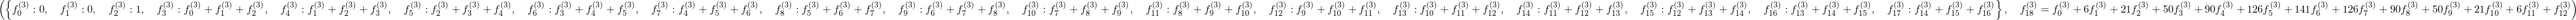

In [37]:
project_recurrence_spec(instantiated_rec_spec, recurrence_eq=True, terms_cache=True)

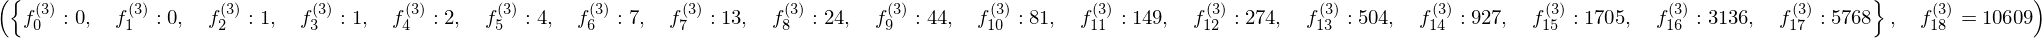

In [38]:
fully_instantiated_spec = repeated_instantiating(instantiated_rec_spec)
project_recurrence_spec(fully_instantiated_spec, recurrence_eq=True, terms_cache=True)

In [39]:
ipython_latex(tribonacci_recurrence_spec, times_range=range(7))

<IPython.core.display.Latex object>

the sequence lying on the middle in the above triangle is known as [A002426][oeis].

[oeis]:http://oeis.org/A002426

## Lucas numbers

Know as [A000032][oeis].

[oeis]:http://oeis.org/A000032

In [5]:
l = IndexedBase('l')
lucas_recurrence = Eq(l[n+2],l[n+1]+l[n])
lucas_recurrence

In [6]:
boundary_conditions = {l[0]:Integer(2), l[1]:Integer(1)}
lucas_recurrence_spec=dict(recurrence_eq=lucas_recurrence, indexed=l, 
                               index=n, terms_cache=boundary_conditions)

In [7]:
unfolded = do_unfolding_steps(lucas_recurrence_spec, 5)

In [8]:
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

In [9]:
factored_recurrence_eq = project_recurrence_spec(factor_rhs_unfolded_rec(unfolded), recurrence_eq=True)
factored_recurrence_eq

In [10]:
factored_recurrence_eq.subs(n,10)

In [11]:
instantiated_rec_spec = base_instantiation(unfolded)

In [12]:
project_recurrence_spec(instantiated_rec_spec, recurrence_eq=True, terms_cache=True)

In [13]:
fully_instantiated_spec = repeated_instantiating(instantiated_rec_spec)
project_recurrence_spec(fully_instantiated_spec, recurrence_eq=True, terms_cache=True)

In [14]:
ipython_latex(lucas_recurrence_spec, times_range=range(10))

<IPython.core.display.Latex object>

## Another recurrence relation on Fibonacci numbers

In [21]:
f = IndexedBase('f')
fibonacci_recurrence = Eq(f[2*n+1],f[n]**2+f[n+1]**2)
fibonacci_recurrence

In [22]:
boundary_conditions = {f[0]:Integer(1), f[1]:Integer(1)}
fibonacci_recurrence_spec=dict(recurrence_eq=fibonacci_recurrence, indexed=f, 
                               index=n, terms_cache=boundary_conditions)

In [23]:
unfolded = do_unfolding_steps(fibonacci_recurrence_spec, 2)

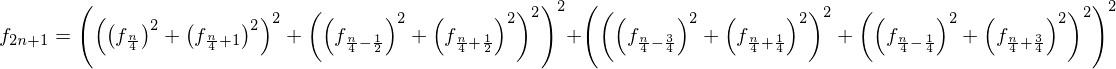

In [24]:
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

In [92]:
factored_recurrence_eq = project_recurrence_spec(factor_rhs_unfolded_rec(unfolded), recurrence_eq=True)
factored_recurrence_eq

In [95]:
factored_recurrence_eq.subs(n,3)

## Unfolding a recurrence with generic coefficients

In [4]:
s = IndexedBase('s')
a = IndexedBase('a')
swaps_recurrence = Eq(n*s[n],(n+1)*s[n-1]+a[n])
swaps_recurrence

In [5]:
boundary_conditions = {s[0]:Integer(0)}
swaps_recurrence_spec=dict(recurrence_eq=swaps_recurrence, indexed=s, 
                               index=n, terms_cache=boundary_conditions)

In [6]:
unfolded = do_unfolding_steps(swaps_recurrence_spec, 4)

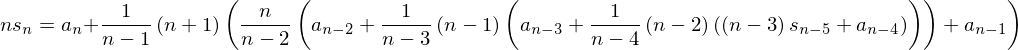

In [7]:
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

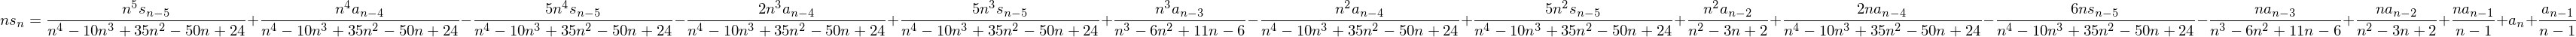

In [8]:
factored_recurrence_eq = project_recurrence_spec(factor_rhs_unfolded_rec(unfolded), recurrence_eq=True)
factored_recurrence_eq

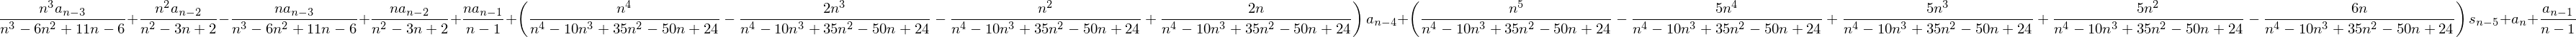

In [9]:
factored_recurrence_eq.rhs.collect(s[n-5]).collect(a[n-4])

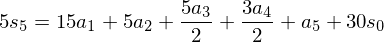

In [10]:
factored_recurrence_eq.subs(n,5)

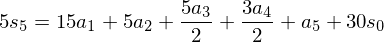

In [11]:
recurrence_eq.subs(n, 5)

In [12]:
def additional_term(n): return (2*Integer(n)-3)/6

as_dict = {a[n]:additional_term(n) for n in range(1,6)}

recurrence_eq.subs(n, 5).subs(as_dict)